In [1]:
source(paste0(file.path("/","mnt","hadoop_tmp","working","Rcode"),"/",list.files(file.path("/","mnt","hadoop_tmp","working","Rcode"),pattern = "_proteome.r$")))




Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: httr

Loading required package: stringr

Loading required package: pbapply

Loading required package: reshape2


Attaching package: ‘reshape2’


The following objects are masked from ‘package:data.table’:

    dcast, melt




In [2]:
getwd()
path <- file.path("/","mnt","hadoop_tmp","working","2022 YEO","2023_BV2_siIft88_CD63IP_Lysate_220818")
rawPD<-list.files(path, pattern = "_Proteins.txt$")
#infoPD<-list.files(path, pattern = "_InputFiles.txt$")
print(rawPD)
#path1 <- system.file("extdata", package="wrProteo")
#fiNaPd <- "pxd001819_PD24_Proteins.txt.gz"

[1] "/mnt/hadoop_tmp/working/2022 YEO/2023_BV2_siIft88_CD63IP_Lysate_220818"

[1] "230315_220818_bv_siI_LysateCD63IP_Proteins.txt"


In [3]:
datafromPD<-lapply(rawPD, function(file){
  return(fread(paste0(path,"/",file)))
})



require(stringr)
for(i in seq_len(length(datafromPD))){
  colnames(datafromPD[[i]])<-str_replace_all(colnames(datafromPD[[i]]),"[ ]",".")
  colnames(datafromPD[[i]])<-str_replace_all(colnames(datafromPD[[i]]),"[-]","_")
}

counts<-lapply(datafromPD, function(data){
  cts<-data %>% base::subset(select = c("Accession",grep("^Abundances.Normalized.", colnames(data), value=TRUE))) 
  return(cts)
})

In [4]:
k = 1 # select number number from "print(rawPD)"
colnames(counts[[k]])

[1] "Accession"                                     
 [2] "Abundances.Normalized.F1.Sample.Con"           
 [3] "Abundances.Normalized.F2.Sample.Con"           
 [4] "Abundances.Normalized.F3.Sample.Con"           
 [5] "Abundances.Normalized.F4.Sample.Con"           
 [6] "Abundances.Normalized.F5.Sample.Con_Abeta"     
 [7] "Abundances.Normalized.F6.Sample.Con_Abeta"     
 [8] "Abundances.Normalized.F7.Sample.Con_Abeta"     
 [9] "Abundances.Normalized.F8.Sample.Con_Abeta"     
[10] "Abundances.Normalized.F9.Sample.siIft88"       
[11] "Abundances.Normalized.F10.Sample.siIft88"      
[12] "Abundances.Normalized.F11.Sample.siIft88"      
[13] "Abundances.Normalized.F12.Sample.siIft88"      
[14] "Abundances.Normalized.F13.Sample.siIft88_Abeta"
[15] "Abundances.Normalized.F14.Sample.siIft88_Abeta"
[16] "Abundances.Normalized.F15.Sample.siIft88_Abeta"
[17] "Abundances.Normalized.F16.Sample.siIft88_Abeta"

In [5]:
############# Modify variables based on "colnames(counts[[k]])"
y.count<-list("Control"=subset(counts[[k]], select = c("Accession",grep("_Con$", colnames(counts[[k]]), value=TRUE))),
              "Con+Abeta"=subset(counts[[k]], select = c("Accession",grep("Con_Abeta$", colnames(counts[[k]]), value=TRUE))),
              "siIft88"=subset(counts[[k]], select = c("Accession",grep("_siIft88", colnames(counts[[k]]), value=TRUE))),
              "siIft88+Abeta"=subset(counts[[k]], select = c("Accession",grep("_siIft88_Abeta$", colnames(counts[[k]]), value=TRUE))))

Loading required package: ggVennDiagram



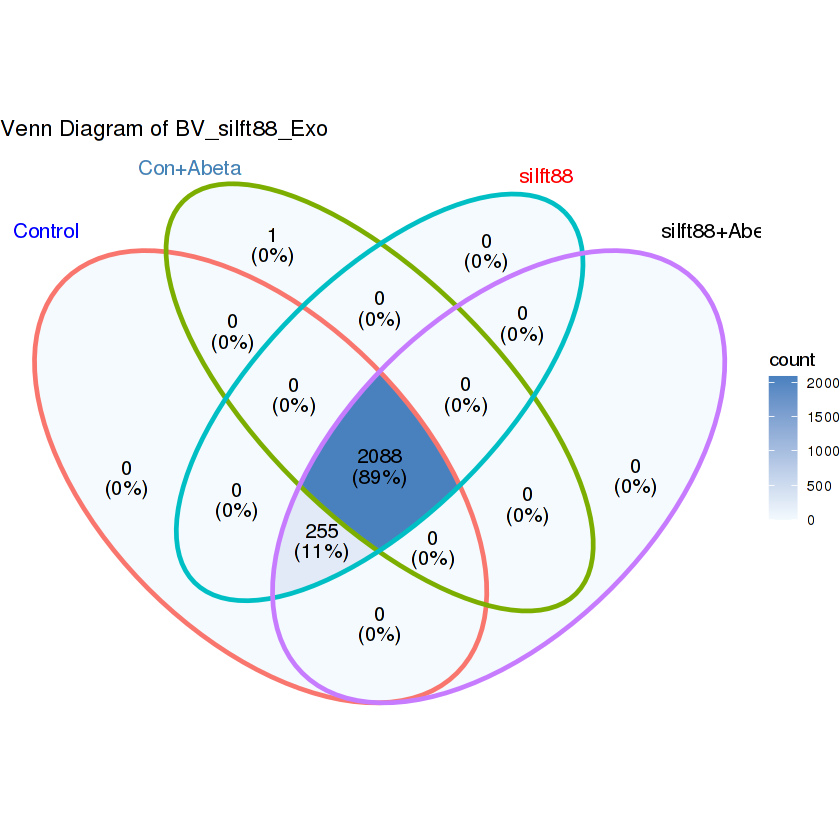

In [6]:
y <- list("Control"= y.count[[1]]$Accession[unique(c(unlist(apply(y.count[[1]], 2, function(x) which(!is.na(x)))[-1])))],
          "Con+Abeta"= y.count[[2]]$Accession[unique(c(unlist(apply(y.count[[2]], 2, function(x) which(!is.na(x)))[-1])))],
          "siIft88"= y.count[[3]]$Accession[unique(c(unlist(apply(y.count[[3]], 2, function(x) which(!is.na(x)))[-1])))],
           "siIft88+Abeta"= y.count[[4]]$Accession[unique(c(unlist(apply(y.count[[4]], 2, function(x) which(!is.na(x)))[-1])))])

require(ggVennDiagram)
p<-ggVennDiagram(y, label_alpha = 0, 
          color =  c("A" = "blue","B" ="steelblue","C" = "red", "'D" = "black") ,
          set_color = c("A" = "blue","B" ="steelblue", "C" = "red", "D" = "black")) + 
#                                                                      scale_fill_distiller(palette = "RdBu")+
    scale_fill_gradient(low = "#F4FAFE", high = "#4981BF")              +
    ggtitle("Venn Diagram of BV_siIft88_Exo")
print(p)
                                                                     
ggsave(paste0(path,"/results/Figure_vennALL.pdf"), p, width =5, height =5, units = "in", device = "pdf", dpi = 600)

In [7]:
############# Modify variables based on "colnames(counts[[k]])"
y.count<-list("Con+Abeta"=subset(counts[[k]], select = c("Accession",grep("Con_Abeta$", colnames(counts[[k]]), value=TRUE))),
              "siIft88+Abeta"=subset(counts[[k]], select = c("Accession",grep("_siIft88_Abeta$", colnames(counts[[k]]), value=TRUE))))

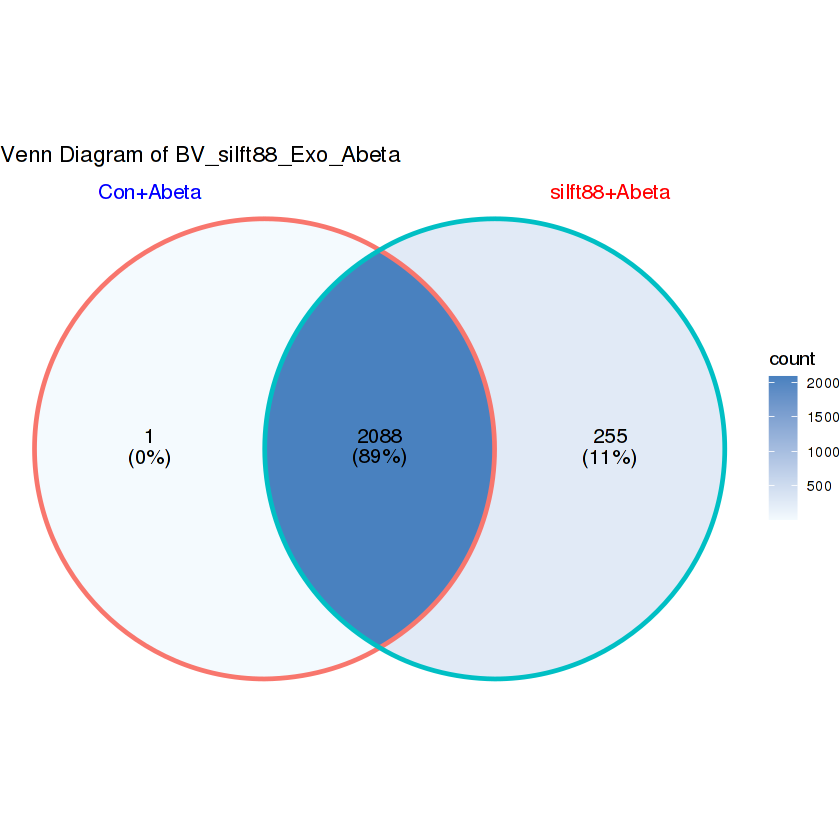

In [8]:
y <- list("Con+Abeta"= y.count[[1]]$Accession[unique(c(unlist(apply(y.count[[1]], 2, function(x) which(!is.na(x)))[-1])))],
          "siIft88+Abeta"= y.count[[2]]$Accession[unique(c(unlist(apply(y.count[[2]], 2, function(x) which(!is.na(x)))[-1])))])

require(ggVennDiagram)
p<-ggVennDiagram(y, label_alpha = 0, 
          color =  c("A" = "blue","B" ="red") ,
          set_color = c("A" = "blue","B" ="red")) + 
#                                                                      scale_fill_distiller(palette = "RdBu")+
    scale_fill_gradient(low = "#F4FAFE", high = "#4981BF")              +
    ggtitle("Venn Diagram of BV_siIft88_Exo_Abeta")
print(p)
                                                                     
ggsave(paste0(path,"/results/Figure_vennAbeta.pdf"), p, width =5, height =5, units = "in", device = "pdf", dpi = 600)

In [9]:
resultUNIPROT <- pbapply::pblapply(datafromPD[[k]]$Accession,function(ids){ #[-grep("ProteinCenter:sp_incl_isoforms",datafromPD$Accession)]
    data <- uniprot_mapping(ids)
    content(data, as= "text", encoding = 'UTF-8')
    res<-unlist(str_split(unlist(str_split(unlist(str_split(content(data, as= "text", encoding = 'UTF-8'),"\\t")),"\\n"))[4]," "))[1]
    return(res)
  })
  
  results_from_uniprot <- data.frame('Accession' = datafromPD[[k]]$Accession,  #[-grep("ProteinCenter:sp_incl_isoforms",datafromPD$Accession)]
                                     'Gene.names' = unlist(resultUNIPROT))
  require(stringi)
  # str_sub(datafromPD[[k]]$Description[1], #[-grep("ProteinCenter:sp_incl_isoforms",datafromPD$Accession)]
  #         str_locate(datafromPD[[k]]$Description[1],pattern = "GN=")[2]+1, #[-grep("ProteinCenter:sp_incl_isoforms",datafromPD$Accession)]
  #         str_locate(datafromPD[[k]]$Description[1],pattern = "PE=")[1]-2) #[-grep("ProteinCenter:sp_incl_isoforms",datafromPD$Accession)]
  # seq_len(length(dataPD$Description))
  result<-lapply(datafromPD[[k]]$Description, function(desc){ #[-grep("ProteinCenter:sp_incl_isoforms",datafromPD$Accession)]
    # str_sub(grep("GN=",unlist(str_split(desc, " ")), value = TRUE),start = 4L)
    str_sub(desc, 
            str_locate(desc,pattern = "GN=")[2]+1,
            str_locate(desc,pattern = "PE=")[1]-2)
  })
  
  result<-make.unique(unlist(result))
  
  results_from_datasheet <- data.frame('Protein.IDs' = datafromPD[[k]]$"Accession",  'Gene.names' = result) #[-grep("ProteinCenter:sp_incl_isoforms",datafromPD$Accession)]
  results_from_uniprot <- na.omit(results_from_uniprot)
  results_from_uniprot$Gene.names[which(results_from_uniprot$Gene.names=="")] <- result[which(datafromPD[[k]]$"Accession" %in% results_from_uniprot$Accession[which(results_from_uniprot$Gene.names=="")])]
  
  dat<-merge(counts[[k]], results_from_uniprot, by = "Accession")
  
  data_unique <- make_unique(dat, "Gene.names", "Accession", delim = ";")

  |::::::::::::::::::::::::::::::::::::::::::::::::::| 100%


Loading required package: stringi



In [10]:
############# Part 2. Not imputed
data <-  merge(datafromPD[[k]], results_from_uniprot, by = "Accession")


data.merged_neo <- subset(data, select=c("Gene.names","Accession",grep("^Abundance.Ratio.log2.|^Abundance.Ratio.Weight.|^Abundance.Ratio.Adj.P_Value",colnames(data), value = TRUE)))

colnames(data.merged_neo)

[1] "Gene.names"                                          
 [2] "Accession"                                           
 [3] "Abundance.Ratio.log2.Con_Abeta..Con"                 
 [4] "Abundance.Ratio.log2.siIft88..Con"                   
 [5] "Abundance.Ratio.log2.siIft88_Abeta..Con_Abeta"       
 [6] "Abundance.Ratio.log2.siIft88_Abeta..siIft88"         
 [7] "Abundance.Ratio.Adj.P_Value.Con_Abeta..Con"          
 [8] "Abundance.Ratio.Adj.P_Value.siIft88..Con"            
 [9] "Abundance.Ratio.Adj.P_Value.siIft88_Abeta..Con_Abeta"
[10] "Abundance.Ratio.Adj.P_Value.siIft88_Abeta..siIft88"  
[11] "Abundance.Ratio.Weight.Con_Abeta..Con"               
[12] "Abundance.Ratio.Weight.siIft88..Con"                 
[13] "Abundance.Ratio.Weight.siIft88_Abeta..Con_Abeta"     
[14] "Abundance.Ratio.Weight.siIft88_Abeta..siIft88"

In [26]:
data_export <- subset(data, select=c("Gene.names","Accession",grep("^Abundance.Ratio.log2.|^Abundance.Ratio.P_Value|^Abundance.Ratio.Adj.P_Value",colnames(data), value = TRUE))) 
data_exports <-subset(data_export, select=c("Gene.names","Accession",grep("siIft88_Abeta..Con_Abeta$",colnames(data_export), value = TRUE)))

require(xlsx)
write.xlsx(data_exports, paste0(path,"/results/Figure7e_BVsiIft88_CD63IP_Lysate.xlsx"))

In [11]:
objDat <- subset(data.merged_neo, select=c("Gene.names","Accession",grep("siIft88_Abeta..Con_Abeta$",colnames(data.merged_neo), value = TRUE)))
print(colnames(objDat))

colnames(objDat)<- c('Gene.names','Accession','Abundance.Ratio.log2','Abundance.Ratio.P_Value','Abundance.Ratio.Weight')


[1] "Gene.names"                                          
[2] "Accession"                                           
[3] "Abundance.Ratio.log2.siIft88_Abeta..Con_Abeta"       
[4] "Abundance.Ratio.Adj.P_Value.siIft88_Abeta..Con_Abeta"
[5] "Abundance.Ratio.Weight.siIft88_Abeta..Con_Abeta"     


In [12]:
insGenes <- objDat %>% dplyr::filter(Abundance.Ratio.log2 > 0.25 & Abundance.Ratio.P_Value < 0.05) %>% pull(Gene.names)
insGenes.n <- objDat %>% dplyr::filter(Abundance.Ratio.log2 < -0.25 & Abundance.Ratio.P_Value < 0.05) %>% pull(Gene.names)

In [34]:
na.omit(insGenes) %>% length()
na.omit(insGenes.n) %>% length()

[1] 96

[1] 127

In [13]:
library(enrichR)
library(httr)
# Check available databases to perform enrichment (then choose one)
databases <- enrichR::listEnrichrDbs()$libraryName

# insGenes <- mg.subset.DE[[id]] %>% dplyr::filter(p_val < 0.01  & avg_log2FC < -0.25) %>% rownames()



Welcome to enrichR
Checking connection ... 

Enrichr ... 
Connection is Live!

FlyEnrichr ... 
Connection is Live!

WormEnrichr ... 
Connection is Live!

YeastEnrichr ... 
Connection is Live!

FishEnrichr ... 
Connection is Live!

OxEnrichr ... 
Connection is Live!



In [14]:
enrich_results <- enrichr(genes = insGenes, databases = grep("GO|Reactome|Wiki|KEGG",databases, value = TRUE)[c(28, 34, 36:38)])
enrich_results.n <- enrichr(genes = insGenes.n, databases = grep("GO|Reactome|Wiki|KEGG",databases, value = TRUE)[c(28, 34, 36:38)])

Uploading data to Enrichr... Done.
  Querying KEGG_2019_Mouse... Done.
  Querying Reactome_2022... Done.
  Querying GO_Biological_Process_2023... Done.
  Querying GO_Cellular_Component_2023... Done.
  Querying GO_Molecular_Function_2023... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying KEGG_2019_Mouse... Done.
  Querying Reactome_2022... Done.
  Querying GO_Biological_Process_2023... Done.
  Querying GO_Cellular_Component_2023... Done.
  Querying GO_Molecular_Function_2023... Done.
Parsing results... Done.


In [15]:
enrich_result.p <- rbind(cbind(enrich_results[[1]],"group"="KEGG"),
                         cbind(enrich_results[[2]],"group"="reactome"),
                         cbind(enrich_results[[3]],"group"="GO-BP"),
                         cbind(enrich_results[[4]],"group"="GO-CC")) %>% 
                        mutate("Genesize" = (str_split_i(Overlap, "\\/",1))) %>%
                        dplyr::filter(Genesize > 2 & P.value < 0.01)
                         #cbind(enrich_results[[5]][grep("phagocy|cili|Cili|Phagocy||lysosom|Lysosom|secre|Secre|exocy|Exocy|exosom|Exosom", enrich_results[[5]] %>% dplyr::filter(P.value <0.1)  %>% pull(Term)),],"group"="GO-MF")
enrich_result.p$Term

[1] "Endocytosis"                                                                            
 [2] "Central carbon metabolism in cancer"                                                    
 [3] "HIF-1 signaling pathway"                                                                
 [4] "Glycolysis / Gluconeogenesis"                                                           
 [5] "Fc gamma R-mediated phagocytosis"                                                       
 [6] "Budding And Maturation Of HIV Virion R-HSA-162588"                                      
 [7] "Endosomal Sorting Complex Required For Transport (ESCRT) R-HSA-917729"                  
 [8] "Transferrin Endocytosis And Recycling R-HSA-917977"                                     
 [9] "Signal Transduction R-HSA-162582"                                                       
[10] "Rab Regulation Of Trafficking R-HSA-9007101"                                            
[11] "Iron Uptake And Transport R-HSA-917937"                                                 
[12] "Autophagy R-HSA-9612973"                                                                
[13] "Late Phase Of HIV Life Cycle R-HSA-162599"                                              
[14] "RNA Polymerase II Transcribes snRNA Genes R-HSA-6807505"                                
[15] "HIV Life Cycle R-HSA-162587"                                                            
[16] "Cellular Responses To Stress R-HSA-2262752"                                             
[17] "Cellular Responses To Stimuli R-HSA-8953897"                                            
[18] "Signaling By Receptor Tyrosine Kinases R-HSA-9006934"                                   
[19] "Cytosolic Pattern Recognition Receptor Signaling Pathway (GO:0002753)"                  
[20] "Late Endosome To Vacuole Transport Via Multivesicular Body Sorting Pathway (GO:0032511)"
[21] "Positive Regulation Of mRNA Processing (GO:0050685)"                                    
[22] "Multivesicular Body Assembly (GO:0036258)"                                              
[23] "Multivesicular Body Organization (GO:0036257)"                                          
[24] "Regulation Of Transcription Elongation By RNA Polymerase II (GO:0034243)"               
[25] "Positive Regulation Of Immunoglobulin Production (GO:0002639)"                          
[26] "Positive Regulation Of Production Of Molecular Mediator Of Immune Response (GO:0002702)"
[27] "Intracellular Protein Transport (GO:0006886)"                                           
[28] "Positive Regulation Of Transcription Elongation By RNA Polymerase II (GO:0032968)"      
[29] "RNA Splicing (GO:0008380)"                                                              
[30] "Antiviral Innate Immune Response (GO:0140374)"                                          
[31] "Macroautophagy (GO:0016236)"                                                            
[32] "Positive Regulation Of Wnt Signaling Pathway (GO:0030177)"                              
[33] "RNA Processing (GO:0006396)"                                                            
[34] "Negative Regulation Of Innate Immune Response (GO:0045824)"                             
[35] "Defense Response To Virus (GO:0051607)"                                                 
[36] "Negative Regulation Of Protein Ubiquitination (GO:0031397)"                             
[37] "Positive Regulation Of DNA-templated Transcription, Elongation (GO:0032786)"            
[38] "Regulation Of Protein Catabolic Process (GO:0042176)"                                   
[39] "Vesicle-Mediated Transport (GO:0016192)"                                                
[40] "Regulation Of Cilium Assembly (GO:1902017)"                                             
[41] "Positive Regulation Of Canonical Wnt Signaling Pathway (GO:0090263)"                    
[42] "mRNA Metabolic Process (GO:0016071)"                                                    
[43] "Intra

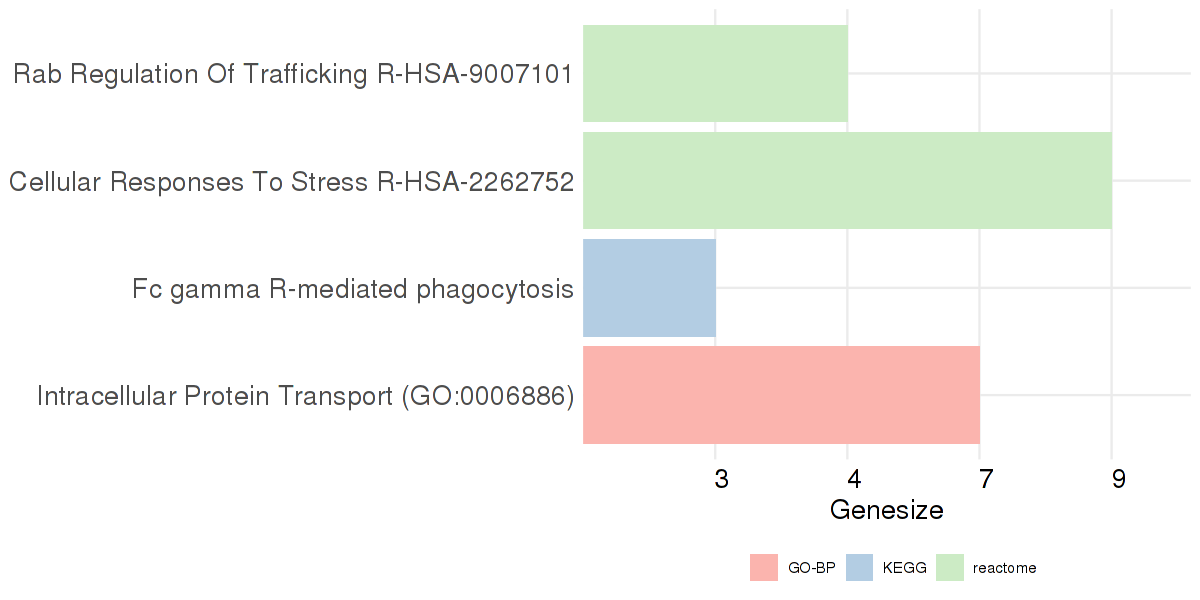

In [19]:
options(repr.plot.width=10, repr.plot.height=5)

require(forcats)

ggplot(enrich_result.p[grep("Rab Regulation Of Trafficking |Cellular Responses To Stress|Intracellular Protein Transport |Fc gamma R-mediated phagocytosis",enrich_result.p$Term),], aes(Genesize, fct_reorder(Term, group),  fill=group)) + 
 geom_col(orientation='y') + 
    #scale_fill_grey(start = 0, end = .9)+
        # xlim(-2.5,2.5)+
    # scale_fill_continuous(low='red', high='blue', guide=guide_colorbar(reverse=TRUE)) + 
scale_fill_brewer(palette = "Pastel1")+
    theme_minimal() + ylab(NULL) +
     theme(legend.position="bottom",
                axis.text.x = element_text(size = 16, hjust = 0, colour = "black"),
                axis.text.y = element_text(size = 16),
                axis.title = element_text(size = 16),
                legend.title = element_blank(),
                legend.background = element_blank())

In [17]:
enrich_result.n <- rbind(cbind(enrich_results.n[[1]],"group"="KEGG"),
                         cbind(enrich_results.n[[2]],"group"="reactome"),
                         cbind(enrich_results.n[[3]],"group"="GO-BP"),
                         cbind(enrich_results.n[[4]],"group"="GO-CC")) %>% 
                        mutate("Genesize" = (str_split_i(Overlap, "\\/",1))) %>%
                        dplyr::filter(Genesize > 2 & P.value < 0.01)
                         #cbind(enrich_results[[5]][grep("phagocy|cili|Cili|Phagocy||lysosom|Lysosom|secre|Secre|exocy|Exocy|exosom|Exosom", enrich_results[[5]] %>% dplyr::filter(P.value <0.1)  %>% pull(Term)),],"group"="GO-MF")
enrich_result.n$Term

[1] "Spliceosome"                                                                                      
 [2] "RNA transport"                                                                                    
 [3] "Amphetamine addiction"                                                                            
 [4] "Glycolysis R-HSA-70171"                                                                           
 [5] "Glucose Metabolism R-HSA-70326"                                                                   
 [6] "Metabolism Of Non-Coding RNA R-HSA-194441"                                                        
 [7] "Cellular Response To Heat Stress R-HSA-3371556"                                                   
 [8] "SARS-CoV-2 Infection R-HSA-9694516"                                                               
 [9] "SARS-CoV Infections R-HSA-9679506"                                                                
[10] "Protein Localization R-HSA-9609507"                                                               
[11] "Processing Of Capped Intron-Containing Pre-mRNA R-HSA-72203"                                      
[12] "SARS-CoV-2 Activates/Modulates Innate And Adaptive Immune Responses R-HSA-9705671"                
[13] "Defective TPR May Confer Susceptibility Towards Thyroid Papillary Carcinoma (TPC) R-HSA-5619107"  
[14] "CaM Pathway R-HSA-111997"                                                                         
[15] "Platelet Activation, Signaling And Aggregation R-HSA-76002"                                       
[16] "Disease R-HSA-1643685"                                                                            
[17] "Ca-dependent Events R-HSA-111996"                                                                 
[18] "Vpr-mediated Nuclear Import Of PICs R-HSA-180910"                                                 
[19] "SARS-CoV-2-host Interactions R-HSA-9705683"                                                       
[20] "Regulation Of HSF1-mediated Heat Shock Response R-HSA-3371453"                                    
[21] "Interactions Of Vpr With Host Cellular Proteins R-HSA-176033"                                     
[22] "DAG And IP3 Signaling R-HSA-1489509"                                                              
[23] "Metabolism Of Carbohydrates R-HSA-71387"                                                          
[24] "Opioid Signaling R-HSA-111885"                                                                    
[25] "DNA Double-Strand Break Repair R-HSA-5693532"                                                     
[26] "PLC Beta Mediated Events R-HSA-112043"                                                            
[27] "KEAP1-NFE2L2 Pathway R-HSA-9755511"                                                               
[28] "G-protein Mediated Events R-HSA-112040"                                                           
[29] "mRNA Splicing - Major Pathway R-HSA-72163"                                                        
[30] "Degradation Of GLI2 By Proteasome R-HSA-5610783"                                                  
[31] "GLI3 Is Processed To GLI3R By Proteasome R-HSA-5610785"                                           
[32] "Selective Autophagy R-HSA-9663891"                                                                
[33] "mRNA Splicing R-HSA-72172"                                                                        
[34] "Platelet Degranulation R-HSA-114608"                                                              
[35] "Response To Elevated Platelet Cytosolic Ca2+ R-HSA-76005"                                         
[36] "Host Interactions Of HIV Factors R-HSA-162909"                                                    
[37] "Positive Regulation Of DNA Demethylation (GO:1901537)"                                            
[38] "Regulation Of DNA Demethylation (GO:1901535)"                                                     
[39] "Chrom

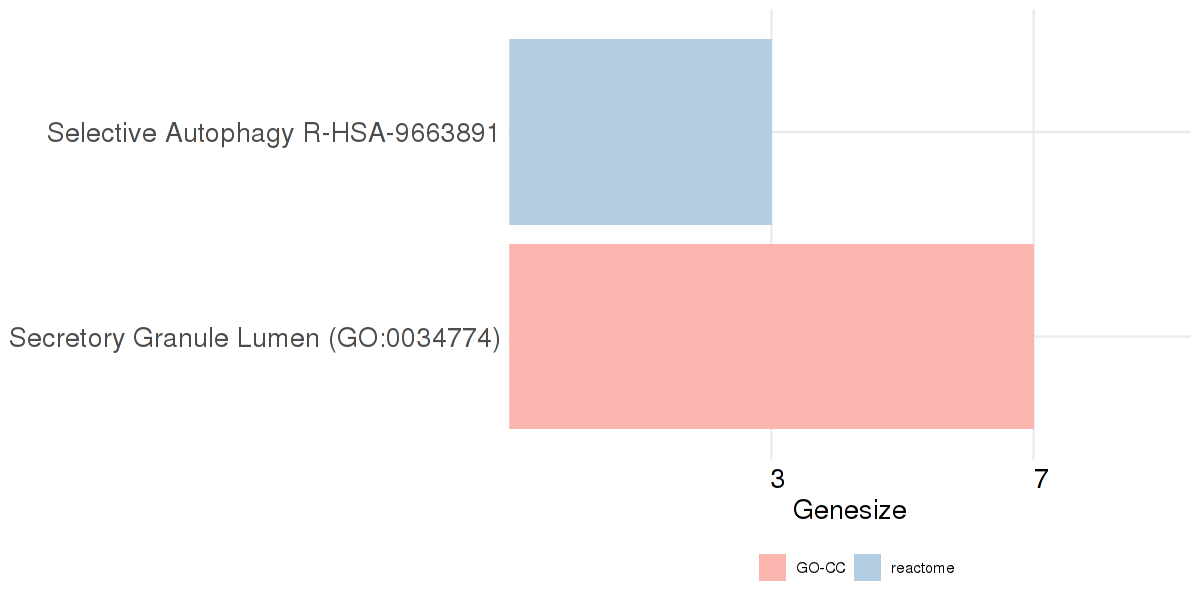

In [20]:
options(repr.plot.width=10, repr.plot.height=5)
require(forcats)

ggplot(enrich_result.n[grep("Selective Autophagy|Secretory Granule Lumen",enrich_result.n$Term),], aes(Genesize, fct_reorder(Term, group),  fill=group)) + 
 geom_col(orientation='y') + 
    #scale_fill_grey(start = 0, end = .9)+
        # xlim(-2.5,2.5)+
    # scale_fill_continuous(low='red', high='blue', guide=guide_colorbar(reverse=TRUE)) + 
scale_fill_brewer(palette = "Pastel1")+
    theme_minimal() + ylab(NULL) +
     theme(legend.position="bottom",
                axis.text.x = element_text(size = 16, hjust = 0, colour = "black"),
                axis.text.y = element_text(size = 16),
                axis.title = element_text(size = 16),
                legend.title = element_blank(),
                legend.background = element_blank())

In [21]:
require(nichenetr)

group1_genes <- unique(unlist(str_split(enrich_result.p$Genes[grep("Rab Regulation Of Trafficking|Intracellular Protein Transport",enrich_result.p$Term)],";"))) %>% convert_human_to_mouse_symbols()#c("Actr3","Naa30","Rabgap1","Tfrc","Vta1")
group2_genes <- unique(unlist(str_split(enrich_result.p$Genes[grep("Cellular Responses To Stress",enrich_result.p$Term)],";"))) %>% convert_human_to_mouse_symbols()#c("Vcp","Ccar2","H1-3","Rps6ka3")
group3_genes <- unique(unlist(str_split(enrich_result.p$Genes[grep("Fc gamma R-mediated phagocytosis",enrich_result.p$Term)],";"))) %>% convert_human_to_mouse_symbols()#c("Chtop","Cpsf1","Ddx46","Nono")
group4_genes <- unique(unlist(str_split(enrich_result.n$Genes[grep("Selective Autophagy",enrich_result.n$Term)],";"))) %>% convert_human_to_mouse_symbols()#c("Vim","Dynll1","Dynll2","Sqstm1")
group5_genes <- unique(unlist(str_split(enrich_result.n$Genes[grep("Secretory Granule",enrich_result.n$Term)],";"))) %>% convert_human_to_mouse_symbols()#c("Nup133","Ndufa5","Ranbp10","Stom")

Loading required package: nichenetr

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)



In [33]:
print(group1_genes)
print(group2_genes)
print(group3_genes)
print(group4_genes)
print(group5_genes)

   RABGAP1       GDI2   RAB3GAP2       TSC1    DNAJC19       STX7      TMED2 
 "Rabgap1"     "Gdi2" "Rab3gap2"     "Tsc1"  "Dnajc19"     "Stx7"    "Tmed2" 
    VPS37B       PHB2      VPS28 
  "Vps37b"     "Phb2"    "Vps28" 
   RPS6KA3        VCP     CAPZA1   ATP6V1B2      RPL35     HIF1AN    ATP6V0C 
 "Rps6ka3"      "Vcp"   "Capza1" "Atp6v1b2"    "Rpl35"   "Hif1an"  "Atp6v0c" 
     CCAR2       <NA> 
   "Ccar2"         NA 
    ARPC3      CFL1   PIP5K1B 
  "Arpc3"    "Cfl1" "Pip5k1b" 
   TOMM70     PLIN3    DYNLL2 
"Tomm70a"   "Plin3"  "Dynll2" 
     APP      GRN    XRCC5    PRKCD    HUWE1     PGM2   GTPBP2 
   "App"    "Grn"  "Xrcc5"  "Prkcd"  "Huwe1"   "Pgm1" "Gtpbp2" 


In [24]:
enrich_result.p[grep("Rab Regulation Of Trafficking |Cellular Responses To Stress|Intracellular Protein Transport |Fc gamma R-mediated phagocytosis",enrich_result.p$Term),]
enrich_result.n[grep("Selective Autophagy|Secretory Granule Lumen",enrich_result.n$Term),]

-log10(enrich_result.p$Adjusted.P.value[grep("Rab Regulation Of Trafficking |Cellular Responses To Stress|Intracellular Protein Transport |Fc gamma R-mediated phagocytosis",enrich_result.p$Term)])
-log10(enrich_result.n$Adjusted.P.value[grep("Selective Autophagy|Secretory Granule Lumen",enrich_result.n$Term)])

,Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Odds.Ratio,Combined.Score,Genes,group,Genesize
,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>
5,Fc gamma R-mediated phagocytosis,3/87,0.0084911618,0.1264101,0,0,7.611367,36.29655,ARPC3;CFL1;PIP5K1B,KEGG,3
10,Rab Regulation Of Trafficking R-HSA-9007101,4/122,0.0028418811,0.1136997,0,0,7.290346,42.74541,RABGAP1;GDI2;RAB3GAP2;TSC1,reactome,4
16,Cellular Responses To Stress R-HSA-2262752,9/722,0.0078566872,0.1689624,0,0,2.784398,13.49428,RPS6KA3;VCP;CAPZA1;ATP6V1B2;RPL35;HIF1AN;ATP6V0C;CCAR2;H1-3,reactome,9
27,Intracellular Protein Transport (GO:0006886),7/325,0.0009715081,0.0521376,0,0,4.844251,33.60293,DNAJC19;STX7;TMED2;RAB3GAP2;VPS37B;PHB2;VPS28,GO-BP,7


,Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Odds.Ratio,Combined.Score,Genes,group,Genesize
,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>
32,Selective Autophagy R-HSA-9663891,3/61,0.006882562,0.11987129,0,0,8.265434,41.15165,TOMM70;PLIN3;DYNLL2,reactome,3
84,Secretory Granule Lumen (GO:0034774),7/316,0.004091623,0.09001571,0,0,3.693312,20.30883,APP;GRN;XRCC5;PRKCD;HUWE1;PGM2;GTPBP2,GO-CC,7


[1] 0.8982184 0.9442405 0.7722099 1.2828489

[1] 0.9212848 1.0456817

Loading required package: RColorBrewer

Warning message:
“Removed 220 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 311 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 6 rows containing missing values (`geom_text_repel()`).”


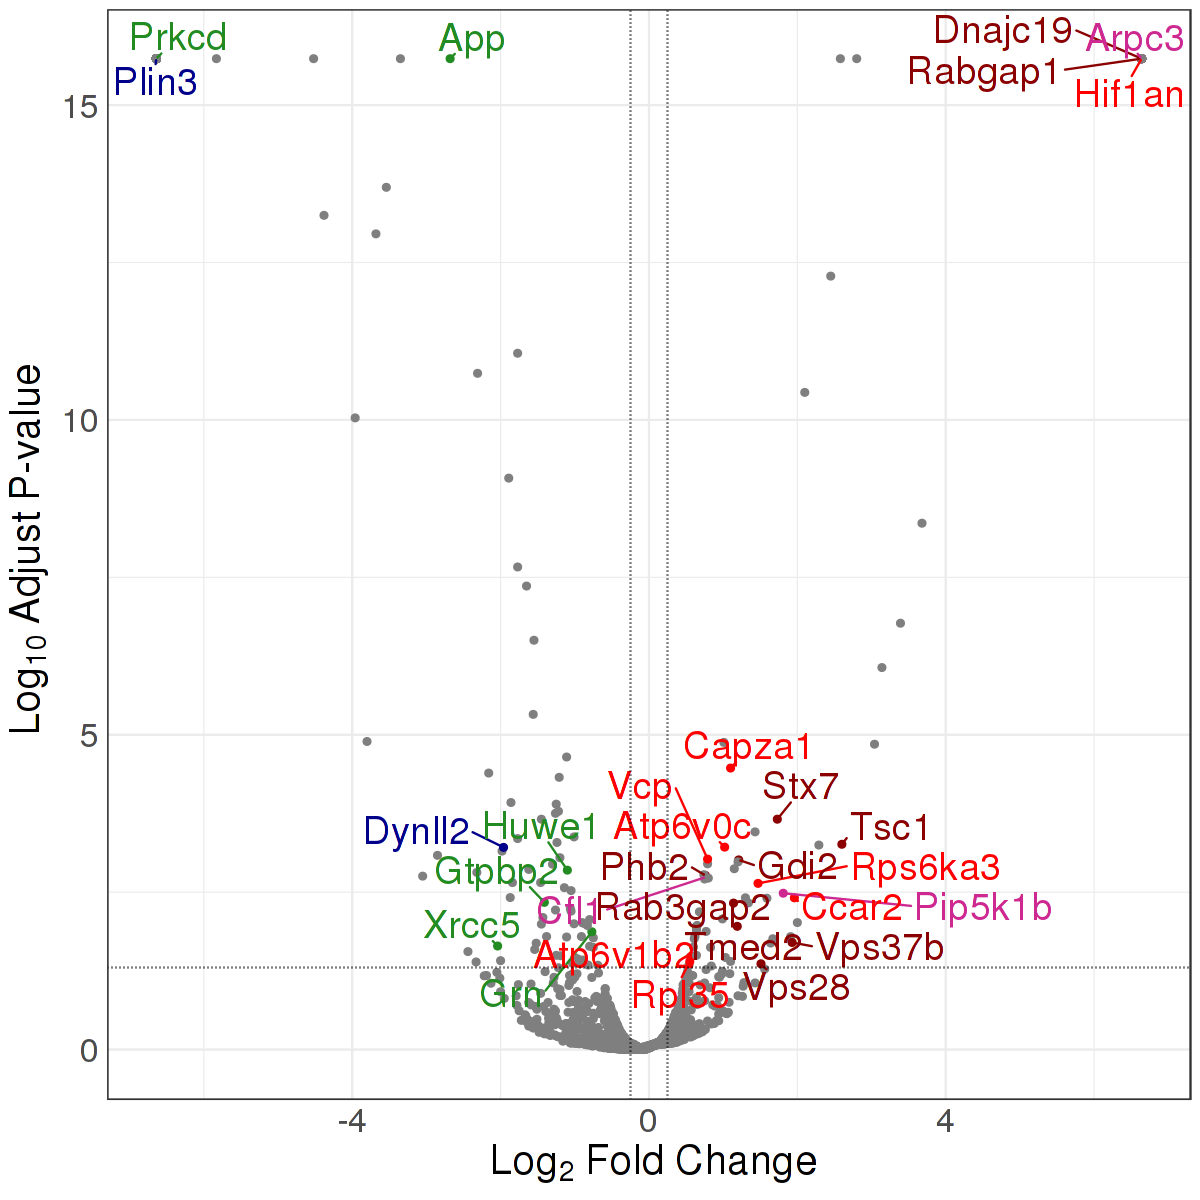

Warning message:
“Removed 220 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 311 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 6 rows containing missing values (`geom_text_repel()`).”


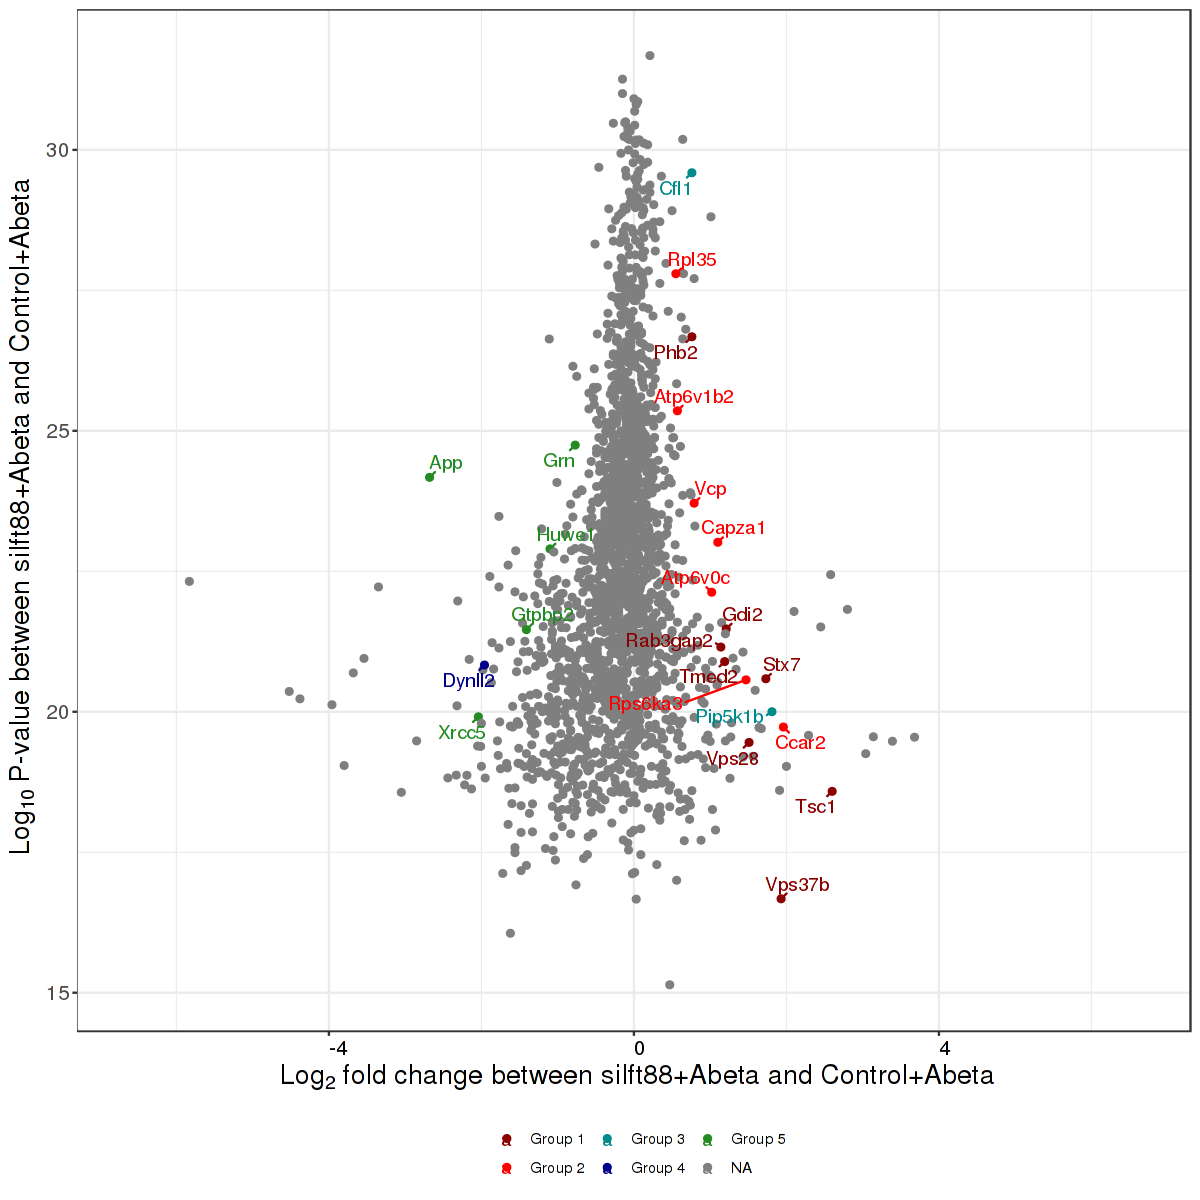

In [22]:

# options(repr.plot.width = 16, repr.plot.height = 16)
keyvals.colour <- c()
keyvals.colour <- ifelse(objDat$Gene.names %in% group1_genes, 'darkred', 'grey50')
keyvals.colour[objDat$Gene.names %in% group2_genes] <- "red"
keyvals.colour[objDat$Gene.names %in% group3_genes] <- "maroon3"
keyvals.colour[objDat$Gene.names %in% group4_genes] <- "blue4"
keyvals.colour[objDat$Gene.names %in% group5_genes] <- "forestgreen"
keyvals.colour[is.na(keyvals.colour)] <- 'grey70'

names(keyvals.colour)[keyvals.colour == 'grey70'] <- 'ns'
names(keyvals.colour)[keyvals.colour == 'darkred'] <- 'Group 1'
names(keyvals.colour)[keyvals.colour == 'red'] <- 'Group 2'
names(keyvals.colour)[keyvals.colour == 'maroon3'] <- 'Group 3'
names(keyvals.colour)[keyvals.colour == 'blue4'] <- 'Group 4'
names(keyvals.colour)[keyvals.colour == 'forestgreen'] <- 'Group 5'



objDat$group <- names(keyvals.colour)
options(repr.plot.width=10, repr.plot.height=10)
require(RColorBrewer)
require(ggrepel)

p1<-ggplot(objDat, aes(x=Abundance.Ratio.log2, y=-log10(Abundance.Ratio.P_Value), color =group)) + 
  geom_point() +
  geom_text_repel(data = objDat[objDat$Gene.names %in% c(group1_genes,group2_genes,group3_genes,group4_genes,group5_genes)  ,],
                  aes(label=Gene.names), 
                  size = 8,
                  fontface = "italic", 
                  arrow = arrow(length = unit(0.0001, "npc")),
                  #colour = objDat$group,
                  max.overlaps = 100, min.segment.length=0.1)+
  xlab(bquote(~Log[2]~ 'Fold Change'))+
  ylab(bquote(~Log[10]~ 'Adjust P-value'))+
  scale_colour_manual(values = c("darkred","red","maroon3","blue4","forestgreen","grey70"))+ 
        geom_vline(xintercept=c(-0.25, 0.25), col="black", linetype="dotted") +
        geom_hline(yintercept=-log10(0.05), col="black", linetype="dotted") +
  theme_bw()+
  theme(legend.position = "bottom",  
        axis.title = element_text(size = 24, face = "bold"), 
        plot.title = element_blank(), 
        axis.text = element_text(size = 20),  
        axis.line = element_blank(), 
        axis.ticks = element_blank(),
        # legend.key.size = unit(1, 'in'),
         legend.title = element_blank(),
        legend.text = element_text(size=20))    + 
   theme(legend.position = "none")

print(p1)

p2<-ggplot(objDat, aes(x=Abundance.Ratio.log2, y=Abundance.Ratio.Weight, color =group)) + 
  geom_point() +
  geom_text_repel(data = objDat[objDat$Gene.names %in% c(group1_genes,group2_genes,group3_genes,group4_genes,group5_genes)  ,],
                  aes(label=Gene.names), 
                  arrow = arrow(length = unit(0.0001, "npc")),
                  #colour = objDat$group,
                  max.overlaps = 100, min.segment.length=0.1)+
  xlab(bquote(~Log[2]~ 'fold change between siIft88+Abeta and Control+Abeta'))+
  ylab(bquote(~Log[10]~ 'P-value between siIft88+Abeta and Control+Abeta'))+
  scale_colour_manual(values = c("darkred","red","cyan4","blue4","forestgreen","grey70"))+ 
  
  theme_bw()+
  theme(legend.position=c(0.9, 0.2),
        axis.text.x = element_text(size = 12, hjust = 0, colour = "black"),
        axis.text.y = element_text(size = 12),
        axis.title = element_text(size = 16),
        legend.title = element_blank(),
        legend.background = element_blank()) + 
   theme(legend.position = "bottom")

print(p2)


ggsave(paste0(path,"/results/Figure7c_BVsiIft88_CD63IP_Lysate_Volcano plot22.pdf"), p1, width =7.5, height =7.5, units = "in", device = "pdf", dpi = 600)
ggsave(paste0(path,"/results/BVsiIft88_CD63IP_Lysate_ScatterPlot plot22.pdf"), p2, width =7.5, height =7.5, units = "in", device = "pdf", dpi = 600)

In [25]:
require(xlsx)
write.xlsx(enrich_result.p, paste0(path,"/results/Figure7e_BVsiIft88_CD63IP_Lysate_pathwayP.xlsx"))
write.xlsx(enrich_result.n, paste0(path,"/results/Figure7e_BVsiIft88_CD63IP_Lysate_pathwayN.xlsx"))

Loading required package: xlsx

